# Gridded data analysis

In this demo, we will be investigating the extent of **shrubification** in Alaska using the **National Land Cover Database (NLCD)**. "Shrubification" describes the expansion of shrubs across the **Arctic**. Shrubs are woody plants with diverse growth forms but are often the tallest plants occupying tundra ecosystems upslope or northward of the treeline ecotone, and can form dense thickets with closed canopies in suitable habitats. 

Studies indicate that warming temperatures, changes in snow cover, altered disturbance regimes due to permafrost thaw, tundra fires, and anthropogenic activities or changes in herbivory intensity are all contributing to general increases in shrub abundance which will have wide-ranging consequences for the ecosystems and climate of the region.

```{image} images/shrubs.jpeg
:width: 600px
:align: center
```

## National Land Cover Database

The National Land Cover Database (NLCD) provides **gridded land cover** at a 30 m resolution with a **20-class legend (in Alaska)** based on a modified Anderson Level II classification system. 

The database is designed to provide cyclical updates of United States land cover and associated changes. 

Systematically aligned over time, the database provides the ability to understand both current and historical land cover and land cover change, and enables monitoring and trend assessments.

```{image} images/nlcd-classes.jpg
:width: 200px
:align: center
```

## Gridded data

Gridded (or raster) data represent a matrix of cells (or pixels) organized into rows and columns (or a grid). Grid cells can represent data that changes **continuously** across a landscape (surface) such as elevation, air temperature, or . reflectance data from satellite imaging platforms. Grid cells can also represent **discrete** data such as vegetation type or land cover.

```{image} images/raster-matrix.png
:width: 500px
:align: center
```

## Libraries

We recommend three libraries for accessing and analyzing gridded data in Python. The first is called `rasterio` which builds on the popular **Geographic Raster Abstraction Library** or **GDAL**. It supports read/write access for over 160 gridded data formats (e.g. GeoTIFF, NetCDF4) and includes methods for finding dataset information, reprojections, resampling, format conversion, and mosaicking. 

```{image} images/gdal.png
:width: 200px
:align: center
```


In [316]:
# Import libraries
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt

## Open dataset

The data is formatted as an `img` file which is similar to a GeoTIFF (`.tif`). We can therefore open it using `rasterio` function, `open()`. This function takes a **path string** and returns a **dataset object**.

In [279]:
src = rasterio.open('data/NLCD_2016_Land_Cover_AK/NLCD_2016_Land_Cover_AK.img')
src

<open DatasetReader name='data/NLCD_2016_Land_Cover_AK/NLCD_2016_Land_Cover_AK.img' mode='r'>

````{margin}
```{note}
`src` stands for **source**
```
````

## Dataset attributes

The **dataset object** contains a number of **attributes** which can be explored using the following methods. Remember that a raster **band** is an array of values representing **a single** variable in 2D space. All bands of a dataset have the **same** number of rows and columns.

In [280]:
print(f"Number of bands: {src.count}")
print(f"Width: {src.width}")
print(f"Height: {src.height}")

Number of bands: 1
Width: 124236
Height: 67844


## Georeferencing

Like vector data, pixels in raster data can be mapped to regions on the Earth's surface. Like `GeoPandas`, we can display the **coordinate reference system** of our data using the `crs` method. 

In [281]:
src.crs

CRS.from_wkt('PROJCS["WGS_1984_Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

This is a little overwelming but there is some useful information contained here. For example it looks like the data are projected using an [**Albers projection system**](https://en.wikipedia.org/wiki/Albers_projection) and the units are in **meters**. 

We can display some more specific information about a dataset's projection using the `transform` method. This function prints the **spatial resolution** of the dataset (i.e. the dimensions that each pixel of our dataset represents on the ground) and the coordinates of the **top left** corner.

In [282]:
src.transform

Affine(30.0, 0.0, -2232345.0,
       0.0, -30.0, 2380125.0)

Alternatively, we can display the bounding box of our dataset using the `bounds()` method.

In [283]:
src.bounds

BoundingBox(left=-2232345.0, bottom=344805.0, right=1494735.0, top=2380125.0)

## Reading raster data

Now that we have some basic information about our data, we can go ahead and import it using the `read()` function. Data from each band can be accessed by an index number. Note that bands are indexed from 1 due to a  GDAL convention. 

In [284]:
nlcd_2016 = src.read(1)

The `read()` method returns a numpy **N-D array**.

In [285]:
nlcd_2016

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [286]:
type(nlcd_2016)

numpy.ndarray

## Plot data

We can have a look at the data using `matplotlib`. Since the dataset is so big (eight billion pixels!), we will just plot a subset of the data. 

Text(0.5, 1.0, 'Alaska land cover')

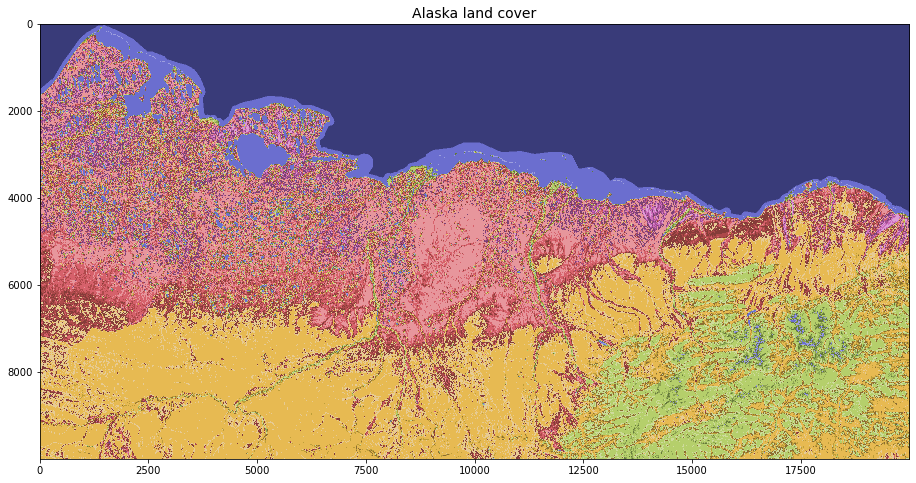

In [287]:
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(nlcd_2016[0:10000, 70000:90000], cmap='tab20b')
ax.set_title("Alaska land cover", fontsize=14)

## Slice and index data

When conducting exploratory analysis, it is often useful to subset the data into smaller chunks. We will focus on the North Slope of Alaska and we can do that using stanard Python slicing (i.e. `array[start:end]`).

In [288]:
nlcd_2016_sample = nlcd_2016[0:10000, 70000:90000]

Next it would useful to identify what some of these colors mean. To do this we could start selecting grid cells using their `row, column` coordinates. In this case we plot the location of **x (or column) = 4000** and **y (or row) = 8000**. 

Text(0.5, 1.0, 'Alaska land cover')

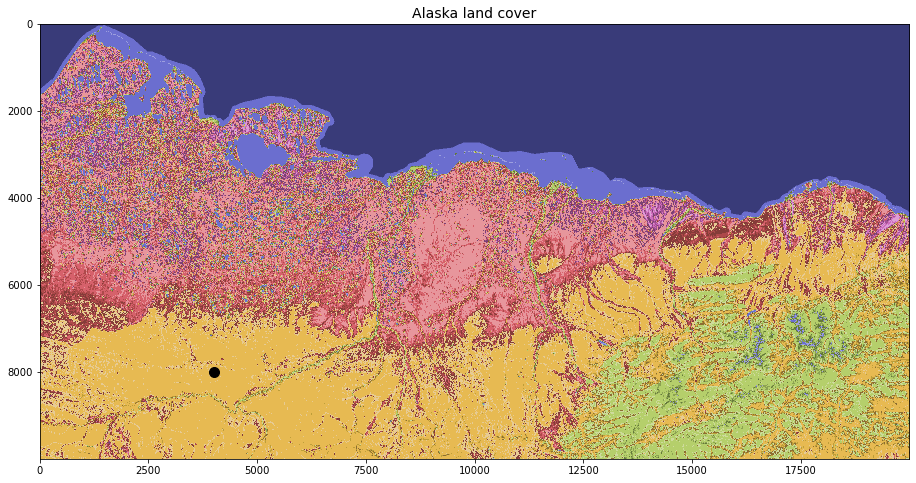

In [290]:
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(nlcd_2016_sample, cmap='tab20b')
ax.scatter(4000, 8000, s=100, color='k')
ax.set_title("Alaska land cover", fontsize=14)

## Single land cover type

We can use **matrix indexing** to find the value of a pixel at a given location (i.e. `array[row, column]`). At row 2000 and column 9000, the land cover type is **51** meaning **dwarf shrubs**. 

```{image} images/nlcd-shrubs.png
:width: 500px
:align: center
```

In [291]:
nlcd_2016_sample[8000, 4000]

51

We can also identify the land cover the ocean.

In [292]:
nlcd_2016_sample[0,0]

0

## Frequency of land cover type

Clearly dwarf shrubs (class 51) cover a large portion the land cover in this region of Alaska. To **quantify** how much area they cover, it would be useful to count the **occurrence of each land cover class**. We can do that using NumPy's [`unique()`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) function, making sure we set `return_counts` to `True`. 

In [293]:
unique, counts = np.unique(nlcd_2016_sample, return_counts=True)
dict(zip(unique, counts))

{0: 54136421,
 11: 17006155,
 12: 1006816,
 21: 549,
 22: 71664,
 23: 10626,
 31: 17919994,
 41: 1437,
 42: 12176,
 43: 7059,
 51: 50502294,
 52: 7187373,
 71: 16190,
 72: 42082616,
 90: 11389,
 95: 10027241}

And convert them to percentages (ignoring ocean values)...

In [294]:
# Count number of land pixels
land_pixels = nlcd_2016_sample.size - np.sum(nlcd_2016_sample == 0)

# Convert to DataFrame
df_2016 = pd.DataFrame(list(zip(unique, counts, (counts/land_pixels)*100)), 
                       columns=['lc', 'count_2016', 'fraction_2016'])
df_2016

,lc,count_2016,fraction_2016
0,0,54136421,37.114420
1,11,17006155,11.658945
2,12,1006816,0.690245
3,21,549,0.000376
4,22,71664,0.049131
5,23,10626,0.007285
6,31,17919994,12.285448
7,41,1437,0.000985
8,42,12176,0.008348
9,43,7059,0.004839


This is very useful. With reference to the NLCD land cover classes, our table shows that the most dominant type of land cover is **dwarf shrub** at **39%**. Another **33%** is classified as **sedge/herbaceous**, **14%** as **barren land**, and **8%** **emergent herbaceous wetlands**. 

```{image} images/classes.png
:alt: numpy
:width: 300px
:align: center
```

## Aggregate land cover classes

Since we are interested in shrubs of all kinds shrubs, we will combine the the **dwarf shrubs** and **shrub/scrub** classes. The most simple way of doing this is to re-assign all grid cells classified as **shrub/scrub** (52) to **dwarf shrubs** (51) using a **mask**.

In [304]:
# Re-assign land cover class
nlcd_2016_sample[nlcd_2016_sample == 52] = 51

In [305]:
# Check there are no more grid cells classified as normal shrubs
unique, counts = np.unique(nlcd_2016_sample, return_counts=True)

# Convert to DataFrame
df_2016 = pd.DataFrame(list(zip(unique, counts, (counts/land_pixels)*100)), 
                       columns=['lc', 'count_2016', 'fraction_2016'])
df_2016

,lc,count_2016,fraction_2016
0,0,54136421,37.114420
1,11,17006155,11.658945
2,12,1006816,0.690245
3,21,549,0.000376
4,22,71664,0.049131
5,23,10626,0.007285
6,31,17919994,12.285448
7,41,1437,0.000985
8,42,12176,0.008348
9,43,7059,0.004839


## Land cover change

The big question here is have these dwarf shrubs always occupied a large portion of the North Slope of Alaska? To answer that we could perform the same analysis on a previous NLCD dataset from 2001.

In [306]:
# Open
src_2001 = rasterio.open('data/NLCD_2001_Land_Cover_AK/NLCD_2001_Land_Cover_AK.img')

# Read
nlcd_2001 = src_2001.read(1)

# Slice
nlcd_2001_sample = nlcd_2001[0:10000, 70000:90000]

# Re-assign land cover class
nlcd_2001_sample[nlcd_2001_sample == 52] = 51

In [307]:
# Count occurrence in each class
unique, counts = np.unique(nlcd_2001_sample, return_counts=True)

# Count number of land pixels
land_pixels = nlcd_2001_sample.size - np.sum(nlcd_2001_sample == 0)

# Convert to DataFrame
df_2001 = pd.DataFrame(list(zip(unique, counts, (counts/land_pixels)*100)),
                       columns=['lc', 'count_2001', 'fraction_2001'])
df_2001

,lc,count_2001,fraction_2001
0,0,54136421,37.114420
1,11,16590763,11.374164
2,12,1270533,0.871042
3,21,412,0.000282
4,22,70542,0.048362
5,23,8753,0.006001
6,31,17783022,12.191544
7,41,1395,0.000956
8,42,12237,0.008389
9,43,7084,0.004857


Combining the DataFrames should allow us to compute the difference between 2001 and 2016

In [308]:
df = pd.merge(df_2001, df_2016, on=['lc'])
df

,lc,count_2001,fraction_2001,count_2016,fraction_2016
0,0,54136421,37.114420,54136421,37.114420
1,11,16590763,11.374164,17006155,11.658945
2,12,1270533,0.871042,1006816,0.690245
3,21,412,0.000282,549,0.000376
4,22,70542,0.048362,71664,0.049131
5,23,8753,0.006001,10626,0.007285
6,31,17783022,12.191544,17919994,12.285448
7,41,1395,0.000956,1437,0.000985
8,42,12237,0.008389,12176,0.008348
9,43,7084,0.004857,7059,0.004839


In [309]:
df['change'] = (df['count_2016'] - df['count_2001'])
df['change_percent'] = (((df['count_2016'] - df['count_2001']) / df['count_2001']) * 100)
df

,lc,count_2001,fraction_2001,count_2016,fraction_2016,change,change_percent
0,0,54136421,37.114420,54136421,37.114420,0,0.000000
1,11,16590763,11.374164,17006155,11.658945,415392,2.503755
2,12,1270533,0.871042,1006816,0.690245,-263717,-20.756407
3,21,412,0.000282,549,0.000376,137,33.252427
4,22,70542,0.048362,71664,0.049131,1122,1.590542
5,23,8753,0.006001,10626,0.007285,1873,21.398378
6,31,17783022,12.191544,17919994,12.285448,136972,0.770240
7,41,1395,0.000956,1437,0.000985,42,3.010753
8,42,12237,0.008389,12176,0.008348,-61,-0.498488
9,43,7084,0.004857,7059,0.004839,-25,-0.352908


## Conclusion

Oh dear - the extent of dwarf shrubs did **not** increase between 2001 and 2016. One takeway from this could be that shrubification is **not happening** in this region of the Arctic. But the percentage change in dwarf shrubs was very small (-0.06%) and could well be smaller than the uncertainty in our land cover product. For example, if just 1% of pixels were incorrectly classified as shrubs in 2001 our result would be insignificant. 

Other, peraps more signficant changes, that occurred between 2001 and 2016 include an increase in **open water** by **2.5%**, a decrease in **perennial ice/snow** by **21%**, and an decrease in **emergent herbaceous wetlands** by **3.8%**. 

## Direction of land cover change

It would be interesting to know **how** grid cells changed between 2001 and 2016. We can do this by **masking** the 2016 land cover data with specific grid cells from the 2001 land cover data. For example, in the code below we identify grid cells in 2016 that were classified as **emergent herbaceous wetlands** (class 95) in 2001. We then compute what land cover they are by **masking the 2016 land cover data** and using the `unique()` function.

In [310]:
mask = nlcd_2016_sample[nlcd_2001_sample == 95]
unique, counts = np.unique(mask, return_counts=True)

In [311]:
wetland2water_df = pd.DataFrame(list(zip(unique, counts, (counts/mask.shape[0])*100)),
                 columns=['lc', 'count', 'fraction'])
wetland2water_df

,lc,count,fraction
0,11,507060,4.862585
1,12,457,0.004383
2,22,182,0.001745
3,23,232,0.002225
4,31,1740,0.016686
5,51,1026,0.009839
6,72,898,0.008612
7,90,5988,0.057423
8,95,9910204,95.036502


It looks like most of the **emergent herbaceous wetlands** (95%) did not change between 2001 and 2016. When it did, it was most likely to change to **open water**. This may explain why **open water** increased (**2.5%**) by about the same as **emergent herbaceous wetlands** decreased (**3.8%**) between 2001 and 2016. Let's finish this section by plotting a map showing where emergent herbaceous wetlands were replaced by open water.

In [312]:
wetland2water = (nlcd_2001_sample == 95) & ((nlcd_2016_sample == 11))

Text(0.5, 1.0, 'Wetlands to water in Alaska between 2001 and 2016')

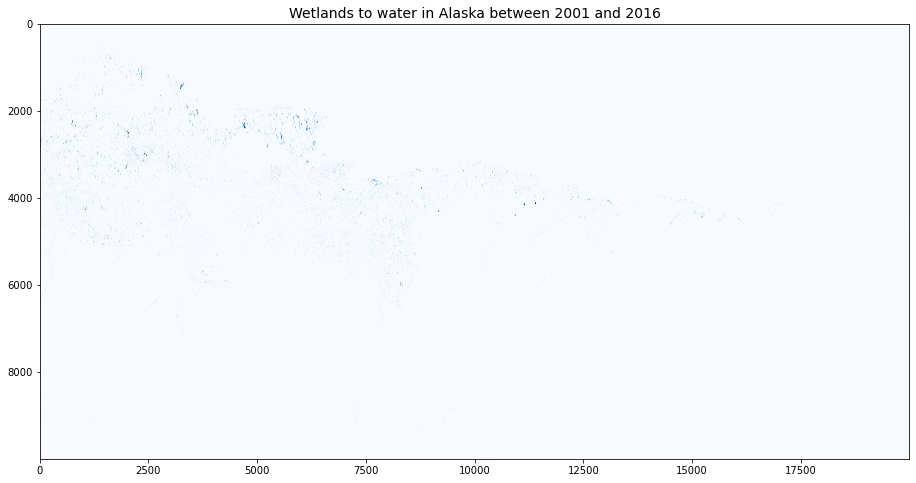

In [313]:
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(wetland2water.astype(int), cmap='Blues')
ax.set_title("Wetlands to water in Alaska between 2001 and 2016", fontsize=14)

At this scale, it's difficult to see what's going on. Let's zoom in a little...

Text(0.5, 1.0, 'Wetlands to water in Alaska between 2001 and 2016')

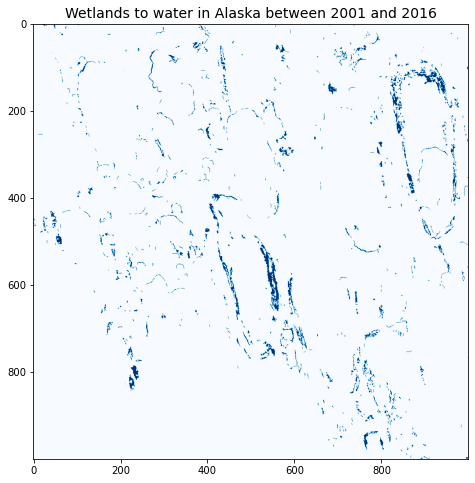

In [314]:
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(wetland2water.astype(int)[2000:3000,5000:6000], cmap='Blues')
ax.set_title("Wetlands to water in Alaska between 2001 and 2016", fontsize=14)